<div style="background: #000;
            color: #FFF;
            margin: 0px;
                padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <span style="margin-left: -15px;"><img src="https://tkhv2-static.s3.amazonaws.com/static-final/assets/img/sec_logo2sec.png"></img></span>
    <h2 style="margin: 0; padding: 0;">Data Science Fellowship</h2>
    <h1 style="padding: 0px 0px 0px 0px;">Week 16 - Class 2 - 01/20!</h1>
</div>

## Objectives for this week:
* Introduction to Data Science
* Introduction to Statistical Analysis
* Statistical Libraries in Python

## Todays Agenda
* Probability
* Intro to linear algebra
* Intro to data visualizations

<a href="#" id="hw"></a>
<div style="background: #000;
            color: #FFF;
            margin: 0px;
                padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 style="padding: 0px 0px 0px 0px;">Homework Presentations</h1>
</div>

### Exercise 2: 
(Due Jan 20th)

Given integer array `nums`, return the third maximum number in this array. If the third maximum does not exist, return the maximum number.

`Example 1:`  
__Input__: nums = [3,2,1]  
__Output__: 1  
__Explanation__: The third maximum is 1.  

`Example 2:`  
__Input__: nums = [1,2]  
__Output__: 2  
__Explanation__: The third maximum does not exist, so the maximum (2) is returned instead.  

`Example 3:`  
__Input__: nums = [2,2,3,1]  
__Output__: 1  
__Explanation__: Note that the third maximum here means the third maximum distinct number.
Both numbers with value 2 are both considered as second maximum.  
 
 

In [ ]:
def ex2(nums):
    nums = sorted(set(nums))
    if len(nums) < 3: return nums[-1]
    else: return nums[-3]

print(ex2([3,2,1]))
print(ex2([1,2]))
print(ex2([2,2,3,1]))

In [ ]:
try:
    assert(ex2([3,2,1]) == 1)
    assert(ex2([1,2]) == 2)
    assert(ex2([2,2,3,1]) == 1)
    print("solution is correct")
except AssertionError:
    print("solution is incorrect")

<a href="#" id="hw"></a>
<div style="background: #000;
            color: #FFF;
            margin-bottom: 10px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 style="padding: 0px 0px 0px 0px;">Probability</h1>
</div>


In [ ]:
from fractions import Fraction

def P(event, space): 
    "The probability of an event, given a sample space of equiprobable outcomes."
    return Fraction(len(event & space), 
                    len(space))

D    = {1, 2, 3, 4, 5, 6}



# Urn Problems

Around 1700, Jacob Bernoulli wrote about removing colored balls from an urn in his landmark treatise *[Ars Conjectandi](https://en.wikipedia.org/wiki/Ars_Conjectandi)*, and ever since then, explanations of probability have relied on [urn problems](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=probability%20ball%20urn). (You'd think the urns would be empty by now.) 

![Jacob Bernoulli](http://www2.stetson.edu/~efriedma/periodictable/jpg/Bernoulli-Jacob.jpg)
<center><a href="https://en.wikipedia.org/wiki/Jacob_Bernoulli">Jacob Bernoulli</a><br>1700</center>

For example, here is a three-part problem [adapted](http://mathforum.org/library/drmath/view/69151.html)  from mathforum.org:

> An urn contains 23 balls: 8 white, 6 blue, and 9 red.  We select six balls at random (each possible selection is equally likely). What is the probability of each of these possible outcomes:

> 1. all balls are red
2. 3 are blue, 2 are white, and 1 is red
3. exactly 4 balls are white

So, an outcome is a set of 6 balls, and the sample space is the set of all possible 6 ball combinations. We'll solve each of the 3 parts using our `P` function, and also using basic arithmetic; that is, *counting*. Counting is a bit tricky because:
- We have multiple balls of the same color. 
- An outcome is a *set* of balls, where order doesn't matter, not a *sequence*, where order matters.

To account for the first issue, I'll have 8 different white balls labelled `'W1'` through `'W8'`, rather than having eight balls all labelled `'W'`.  That makes it clear that selecting `'W1'` is different from selecting `'W2'`.

The second issue is handled automatically by the `P` function, but if I want to do calculations by hand, I will sometimes first count the number of *permutations* of balls, then get the number of *combinations* by dividing the number of permutations by *c*!, where *c* is the number of balls in a combination. For example, if I want to choose 2 white balls from the 8 available, there are 8 ways to choose a first white ball and 7 ways to choose a second, and therefore 8 &times; 7 = 56 permutations of two white balls. But there are only 56 / 2 = 28 combinations, because `(W1, W2)` is the same combination as `(W2, W1)`.

We'll start by defining the contents of the urn:

In [ ]:
def cross(A, B):
    "The set of ways of concatenating one item from collection A with one from B."
    return {a + b 
            for a in A for b in B}

In [ ]:
cross('W', '1234')

In [ ]:
urn = cross('W', '12345678') | cross('B', '123456') | cross('R', '123456789') 

urn

In [ ]:
len(urn)

Now we can define the sample space, `U6`, as the set of all 6-ball combinations.  We use `itertools.combinations` to generate the combinations, and then join each combination into a string:

In [ ]:
import itertools

def combos(items, n):
    "All combinations of n items; each combo as a concatenated str."
    return {' '.join(combo) 
            for combo in itertools.combinations(items, n)}

U6 = combos(urn, 6)

len(U6)

I don't want to print all 100,947 members of the sample space; let's just peek at a random sample of them:

In [ ]:
import random

random.sample(U6, 10)

Is 100,947 really the right number of ways of choosing 6 out of 23 items, or  "23 choose 6", as  mathematicians [call it](https://en.wikipedia.org/wiki/Combination)?  Well, we can choose any of 23 for the first item, any of 22 for the second, and so on down to 18 for the sixth. But we don't care about the ordering of the six items, so we divide the product by 6! (the number of permutations of 6 things) giving us:

$$23 ~\mbox{choose}~ 6 = \frac{23 \cdot 22 \cdot 21 \cdot 20 \cdot 19 \cdot 18}{6!} = 100947$$

Note that $23 \cdot 22 \cdot 21 \cdot 20 \cdot 19 \cdot 18 = 23! \;/\; 17!$, so, generalizing, we can write:

$$n ~\mbox{choose}~ c = \frac{n!}{(n - c)! \cdot c!}$$

And we can translate that to code and verify that 23 choose 6 is 100,947:

In [ ]:
N = 23
C = 6
N-C 17

23 * 22 * 21 * 20 *19 *18 *
---
 6!

In [ ]:
from math import factorial

def choose(n, c):
    "Number of ways to choose c items from a list of n items."
    return factorial(n) // (factorial(n - c) * factorial(c))

In [ ]:
choose(23, 6)

Now we're ready to answer the 4 problems: 

### Urn Problem 1: what's the probability of selecting 6 red balls? 

In [ ]:
red6 = {s for s in U6 if s.count('R') == 6}

P(red6, U6)

In [ ]:
4/4807

Let's investigate a bit more. How many ways of getting 6 red balls are there?

In [ ]:
len(red6)

Why are there 84 ways?  Because there are 9 red balls in the urn, and we are asking how many ways we can choose 6 of them:

In [ ]:
choose(9, 6)

So the probabilty of 6 red balls is then just 9 choose 6 divided by the size of the sample space:

In [ ]:
P(red6, U6) == Fraction(choose(9, 6), 
                        len(U6))

### Urn Problem 2: what is the probability of 3 blue, 2 white, and 1 red?

In [ ]:
b3w2r1 = {s for s in U6 if
          s.count('B') == 3 and s.count('W') == 2 and s.count('R') == 1}

P(b3w2r1, U6)

In [ ]:
240/4807

We can get the same answer by counting how many ways we can choose 3 out of 6 blues, 2 out of 8 whites, and 1 out of 9 reds, and dividing by the number of possible selections:

In [ ]:
P(b3w2r1, U6) == Fraction(choose(6, 3) * choose(8, 2) * choose(9, 1), 
                          len(U6))

Here we don't need to divide by any factorials, because `choose` has already accounted for that. 

We can get the same answer by figuring: "there are 6 ways to pick the first blue, 5 ways to pick the second blue, and 4 ways to pick the third; then 8 ways to pick the first white and 7 to pick the second; then 9 ways to pick a red. But the order `'B1, B2, B3'` should count as the same as `'B2, B3, B1'` and all the other orderings; so divide by 3! to account for the permutations of blues, by 2! to account for the permutations of whites, and by 100947 to get a probability:

In [ ]:
 P(b3w2r1, U6) == Fraction((6 * 5 * 4) * (8 * 7) * 9, 
                           factorial(3) * factorial(2) * len(U6))

### Urn Problem 3: What is the probability of exactly 4 white balls?

We can interpret this as choosing 4 out of the 8 white balls, and 2 out of the 15 non-white balls. Then we can solve it the same three ways:

In [ ]:
w4 = {s for s in U6 if
      s.count('W') == 4}

P(w4, U6)

In [ ]:
P(w4, U6) == Fraction(choose(8, 4) * choose(15, 2),
                      len(U6))

In [ ]:
P(w4, U6) == Fraction((8 * 7 * 6 * 5) * (15 * 14),
                      factorial(4) * factorial(2) * len(U6))

# Revised Version of `P`, with more general events

To calculate the probability of an even die roll, I originally said

    even = {2, 4, 6}
    
But that's inelegant&mdash;I had to explicitly enumerate all the even numbers from one to six. If I ever wanted to deal with a twelve or twenty-sided die, I would have to go back and change  `even`.  I would prefer to define `even` once and for all like this:

In [ ]:
def even(n): return n % 2 == 0

Now in order to make `P(even, D)` work, I'll have to modify `P` to accept an event as either
a *set* of outcomes (as before), or a *predicate* over outcomes&mdash;a function that returns true for an outcome that is in the event:

In [ ]:
def P(event, space): 
    """The probability of an event, given a sample space of equiprobable outcomes.
    event can be either a set of outcomes, or a predicate (true for outcomes in the event)."""
    if is_predicate(event):
        event = such_that(event, space)
    return Fraction(len(event & space), len(space))

is_predicate = callable

def such_that(predicate, collection): 
    "The subset of elements in the collection for which the predicate is true."
    return {e for e in collection if predicate(e)}

Here we see how `such_that`, the new `even` predicate, and the new `P` work:

In [ ]:
such_that(even, D)

In [ ]:
P(even, D)

In [ ]:
D12 = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

such_that(even, D12)

In [ ]:
P(even, D12)

Note: `such_that` is just like the built-in function `filter`, except `such_that` returns a set.

We can now define more interesting events using predicates; for example we can determine the probability that the sum of a three-dice roll is prime (using a definition of `is_prime` that is efficient enough for small `n`):

In [ ]:
D3 = {(d1, d2, d3) for d1 in D for d2 in D for d3 in D}

def prime_sum(outcome): return is_prime(sum(outcome))

def is_prime(n): return n > 1 and not any(n % i == 0 for i in range(2, n))

P(prime_sum, D3)

In [ ]:
73/216.

# Card Problems

Consider dealing a hand of five playing cards. We can define `deck` as a set of 52 cards, and `Hands` as the sample space of all combinations of 5 cards:

In [ ]:
suits = 'SHDC'
ranks = 'A23456789TJQK'
deck  = cross(ranks, suits)
len(deck)

In [ ]:
Hands = combos(deck, 5)

assert len(Hands) == choose(52, 5)

random.sample(Hands, 5)

Now we can answer questions like the probability of being dealt a flush (5 cards of the same suit):

In [ ]:
def flush(hand):
    return any(hand.count(suit) == 5 for suit in suits)

P(flush, Hands)

Or the probability of four of a kind:

In [ ]:
def four_kind(hand):
    return any(hand.count(rank) == 4 for rank in ranks)

P(four_kind, Hands)

# Fermat and Pascal: Gambling, Triangles, and the Birth of Probability

<table>
<tr><td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/Pierre_de_Fermat2.png/140px-Pierre_de_Fermat2.png"><center><a href="https://en.wikipedia.org/wiki/Pierre_de_Fermat">Pierre de Fermat</a><br>1654
<td><img src="https://www.umass.edu/wsp/images/pascal.jpg"><center><a href="https://en.wikipedia.org/wiki/Blaise_Pascal">Blaise Pascal]</a><br>1654
</table>

Consider a gambling game consisting of tossing a coin. Player H wins the game if 10 heads come up, and T wins if 10 tails come up. If the game is interrupted when H has 8 heads and T has 7 tails, how should the pot of money (which happens to be 100 Francs) be split?
In 1654, Blaise Pascal and Pierre de Fermat corresponded on this problem, with Fermat [writing](http://mathforum.org/isaac/problems/prob1.html):

>Dearest Blaise,

>As to the problem of how to divide the 100 Francs, I think I have found a solution that you will find to be fair. Seeing as I needed only two points to win the game, and you needed 3, I think we can establish that after four more tosses of the coin, the game would have been over. For, in those four tosses, if you did not get the necessary 3 points for your victory, this would imply that I had in fact gained the necessary 2 points for my victory. In a similar manner, if I had not achieved the necessary 2 points for my victory, this would imply that you had in fact achieved at least 3 points and had therefore won the game. Thus, I believe the following list of possible endings to the game is exhaustive. I have denoted 'heads' by an 'h', and tails by a 't.' I have starred the outcomes that indicate a win for myself.

    h h h h *       h h h t *       h h t h *       h h t t *
    h t h h *       h t h t *       h t t h *       h t t t
    t h h h *       t h h t *       t h t h *       t h t t
    t t h h *       t t h t         t t t h         t t t t

>I think you will agree that all of these outcomes are equally likely. Thus I believe that we should divide the stakes by the ration 11:5 in my favor, that is, I should receive (11/16)*100 = 68.75 Francs, while you should receive 31.25 Francs.

>I hope all is well in Paris,

>Your friend and colleague,

>Pierre

Pascal agreed with this solution, and [replied](http://mathforum.org/isaac/problems/prob2.html) with a generalization that made use of his previous invention, Pascal's Triangle. There's even [a book](https://smile.amazon.com/Unfinished-Game-Pascal-Fermat-Seventeenth-Century/dp/0465018963?sa-no-redirect=1) about it.

We can solve the problem with the tools we have:

In [ ]:
def win_unfinished_game(Hneeds, Tneeds):
    "The probability that H will win the unfinished game, given the number of points needed by H and T to win."
    def Hwins(outcome): return outcome.count('h') >= Hneeds
    return P(Hwins, continuations(Hneeds, Tneeds))

def continuations(Hneeds, Tneeds):
    "All continuations of a game where H needs `Hneeds` points to win and T needs `Tneeds`."
    rounds = ['ht' for _ in range(Hneeds + Tneeds - 1)]
    return set(itertools.product(*rounds))

In [ ]:
continuations(2, 3)

In [ ]:
win_unfinished_game(2, 3)

Our answer agrees with Pascal and Fermat; we're in good company!

# Non-Equiprobable Outcomes: Probability Distributions

So far, we have made the assumption that every outcome in a sample space is equally likely. In real life, we often get outcomes that are not equiprobable. For example, the probability of a child being a girl is not exactly 1/2, and the probability is slightly different for a second child. An [article](http://people.kzoo.edu/barth/math105/moreboys.pdf) gives the following counts for two-child families in Denmark, where `GB` means a family where the first child is a girl and the second a boy:

    GG: 121801    GB: 126840
    BG: 127123    BB: 135138
    
We will introduce three more definitions:

* [Frequency](https://en.wikipedia.org/wiki/Frequency_%28statistics%29): a number describing how often an outcome occurs. Can be a count like 121801, or a ratio like 0.515.

* [Distribution](http://mathworld.wolfram.com/StatisticalDistribution.html): A mapping from outcome to frequency for each outcome in a sample space. 

* [Probability Distribution](https://en.wikipedia.org/wiki/Probability_distribution): A distribution that has been *normalized* so that the sum of the frequencies is 1.

We define `ProbDist` to take the same kinds of arguments that `dict` does: either a mapping or an iterable of `(key, val)` pairs, and/or optional keyword arguments. 

In [ ]:
class ProbDist(dict):
    "A Probability Distribution; an {outcome: probability} mapping."
    def __init__(self, mapping=(), **kwargs):
        self.update(mapping, **kwargs)
        # Make probabilities sum to 1.0; assert no negative probabilities
        total = sum(self.values())
        for outcome in self:
            self[outcome] = self[outcome] / total
            assert self[outcome] >= 0

We also need to modify the functions `P` and `such_that` to accept either a sample space  or a probability distribution as the second argument.

In [ ]:
def P(event, space): 
    """The probability of an event, given a sample space of equiprobable outcomes. 
    event: a collection of outcomes, or a predicate that is true of outcomes in the event. 
    space: a set of outcomes or a probability distribution of {outcome: frequency} pairs."""
    if is_predicate(event):
        event = such_that(event, space)
    if isinstance(space, ProbDist):
        return sum(space[o] for o in space if o in event)
    else:
        return Fraction(len(event & space), len(space))
    
def such_that(predicate, space): 
    """The outcomes in the sample pace for which the predicate is true.
    If space is a set, return a subset {outcome,...};
    if space is a ProbDist, return a ProbDist {outcome: frequency,...};
    in both cases only with outcomes where predicate(element) is true."""
    if isinstance(space, ProbDist):
        return ProbDist({o:space[o] for o in space if predicate(o)})
    else:
        return {o for o in space if predicate(o)}

Here is the probability distribution for Danish two-child families:

In [ ]:
DK = ProbDist(GG=121801, GB=126840,
              BG=127123, BB=135138)
DK

And here are some predicates that will allow us to answer some questions:

In [ ]:
def first_girl(outcome):  return outcome[0] == 'G'
def first_boy(outcome):   return outcome[0] == 'B'
def second_girl(outcome): return outcome[1] == 'G'
def second_boy(outcome):  return outcome[1] == 'B'
def two_girls(outcome):   return outcome    == 'GG'

In [ ]:
P(first_girl, DK)

In [ ]:
P(second_girl, DK)

The above says that the probability of a girl is somewhere between 48% and 49%, but that it is slightly different between the first or second child.

In [ ]:
P(second_girl, such_that(first_girl, DK)), P(second_girl, such_that(first_boy, DK))

In [ ]:
P(second_boy, such_that(first_girl, DK)), P(second_boy, such_that(first_boy, DK))

The above says that the sex of the second child is more likely to be the same as the first child, by about 1/2 a percentage point.

# More Urn Problems: M&Ms and Bayes

Here's another urn problem (or "bag" problem) [from](http://allendowney.blogspot.com/2011/10/my-favorite-bayess-theorem-problems.html) prolific Python/Probability author [Allen Downey ](http://allendowney.blogspot.com/):

> The blue M&M was introduced in 1995.  Before then, the color mix in a bag of plain M&Ms was (30% Brown, 20% Yellow, 20% Red, 10% Green, 10% Orange, 10% Tan).  Afterward it was (24% Blue , 20% Green, 16% Orange, 14% Yellow, 13% Red, 13% Brown). 
A friend of mine has two bags of M&Ms, and he tells me that one is from 1994 and one from 1996.  He won't tell me which is which, but he gives me one M&M from each bag.  One is yellow and one is green.  What is the probability that the yellow M&M came from the 1994 bag?

To solve this problem, we'll first represent probability distributions for each bag: `bag94` and `bag96`:

In [ ]:
bag94 = ProbDist(brown=30, yellow=20, red=20, green=10, orange=10, tan=10)
bag96 = ProbDist(blue=24, green=20, orange=16, yellow=14, red=13, brown=13)

Next, define `MM` as the joint distribution&mdash;the sample space for picking one M&M from each bag. The outcome `'yellow green'` means that a yellow M&M was selected from the 1994 bag and a green one from the 1996 bag.

In [ ]:
def joint(A, B, sep=''):
    """The joint distribution of two independent probability distributions. 
    Result is all entries of the form {a+sep+b: P(a)*P(b)}"""
    return ProbDist({a + sep + b: A[a] * B[b]
                    for a in A
                    for b in B})

MM = joint(bag94, bag96, ' ')
MM

First we'll look at the "One is yellow and one is green" part:

In [ ]:
def yellow_and_green(outcome): return 'yellow' in outcome and 'green' in outcome

such_that(yellow_and_green, MM)

Now we can answer the question: given that we got a yellow and a green (but don't know which comes from which bag), what is the probability that the yellow came from the 1994 bag?

In [ ]:
def yellow94(outcome): return outcome.startswith('yellow')

P(yellow94, such_that(yellow_and_green, MM))

So there is a 74% chance that the yellow comes from the 1994 bag.

Answering this question was straightforward: just like all the other probability problems, we simply create a sample space, and use `P` to pick out the probability of the event in question, given what we know about the outcome.
But in a sense it is curious that we were able to solve this problem with the same methodology as the others: this problem comes from a section titled **My favorite Bayes's Theorem Problems**, so one would expect that we'd need to invoke Bayes Theorem to solve it.  The computation above shows that that is not necessary. 

![Bayes](http://img1.ph.126.net/xKZAzeOv_mI8a4Lwq7PHmw==/2547911489202312541.jpg)
<center><a href="https://en.wikipedia.org/wiki/Thomas_Bayes">Rev. Thomas Bayes</a><br>1701-1761
</center>

Of course, we *could* solve it using Bayes Theorem. Why is Bayes Theorem recommended? Because we are asked about the probability of an event given the evidence, which is not immediately available; however the probability of the evidence given the event is.  

Before we see the colors of the M&Ms, there are two hypotheses, `A` and `B`, both with equal probability:

    A: first M&M from 94 bag, second from 96 bag
    B: first M&M from 96 bag, second from 94 bag
    P(A) = P(B) = 0.5
    
Then we get some evidence:
    
    E: first M&M yellow, second green
    
We want to know the probability of hypothesis `A`, given the evidence:
    
    P(A | E)
    
That's not easy to calculate (except by enumerating the sample space). But Bayes Theorem says:
    
    P(A | E) = P(E | A) * P(A) / P(E)
    
The quantities on the right-hand-side are easier to calculate:
    
    P(E | A) = 0.20 * 0.20 = 0.04
    P(E | B) = 0.10 * 0.14 = 0.014
    P(A)     = 0.5
    P(B)     = 0.5
    P(E)     = P(E | A) * P(A) + P(E | B) * P(B) 
             = 0.04     * 0.5  + 0.014    * 0.5   =   0.027
    
And we can get a final answer:
    
    P(A | E) = P(E | A) * P(A) / P(E) 
             = 0.04     * 0.5  / 0.027 
             = 0.7407407407
             
You have a choice: Bayes Theorem allows you to do less calculation at the cost of more algebra; that is a great trade-off if you are working with pencil and paper. Enumerating the state space allows you to do less algebra at the cost of more calculation; often a good trade-off if you have a computer. But regardless of the approach you use, it is important to understand Bayes theorem and how it works.

There is one important question that Allen Downey does not address: *would you  eat twenty-year-old M&Ms*?
&#128552;

# Newton's Answer to a Problem by Pepys

<table>
<tr><td><img src="http://scienceworld.wolfram.com/biography/pics/Newton.jpg"><center><a href="https://en.wikipedia.org/wiki/Isaac_Newton">Isaac Newton</a><br>1693</center>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Samuel_Pepys_portrait.jpg/148px-Samuel_Pepys_portrait.jpg"><center><a href="https://en.wikipedia.org/wiki/Samuel_Pepys">Samuel Pepys</a><br>1693</center>
</table>

[This paper](http://fermatslibrary.com/s/isaac-newton-as-a-probabilist) explains how  Samuel Pepys wrote to Isaac Newton in 1693 to pose the problem:

> Which of the following three propositions has the greatest chance of success? 
  1. Six fair dice are tossed independently and at least one “6” appears. 
  2. Twelve fair dice are tossed independently and at least two “6”s appear. 
  3. Eighteen fair dice are tossed independently and at least three “6”s appear.
  
Newton was able to answer the question correctly (although his reasoning was not quite right); let's see how we can do. Since we're only interested in whether a die comes up as "6" or not, we can define a single die and the joint distribution over *n* dice as follows:

In [ ]:
die = ProbDist({'6':1/6, '-':5/6})

print(die)

In [ ]:
def dice(n, die):
    "Joint probability from tossing n dice."
    if n == 1:
        return die
    else:
        return joint(die, dice(n - 1, die))

In [ ]:
dice(3, die)

Now we are ready to determine which proposition is more likely to have the required number of sixes:

In [ ]:
def at_least(k, result): return lambda s: s.count(result) >= k

In [ ]:
P(at_least(1, '6'), dice(6, die))

In [ ]:
P(at_least(2, '6'), dice(12, die))

In [ ]:
P(at_least(4, '6'), dice(18, die))

We reach the same conclusion Newton did, that the best chance is rolling six dice.

<hr>

# Simulation

Sometimes it is inconvenient to explicitly define a sample space. Perhaps the sample space is infinite, or perhaps it is just very large and complicated, and we feel more confident in writing a program to *simulate* one pass through all the complications, rather than try to *enumerate* the complete sample space. *Random sampling* from the simulation
can give an accurate estimate of the probability.

# Simulating Monopoly

![](http://buckwolf.org/a.abcnews.com/images/Entertainment/ho_hop_go_050111_t.jpg)<center>[Mr. Monopoly](https://en.wikipedia.org/wiki/Rich_Uncle_Pennybags)<br>1940&mdash;

Consider [problem 84](https://projecteuler.net/problem=84) from the excellent [Project Euler](https://projecteuler.net), which asks for the probability that a player in the game Monopoly ends a roll on each of the squares on the board.  To answer this we need to take into account die rolls, chance and community chest cards, and going to jail (from the "go to jail" space, from a card, or from rolling doubles three times in a row). We do not need to take into account anything about buying or selling properties or exchanging money or winning or losing the game, because these don't change a player's location. We will assume that a player in jail will always pay to get out of jail immediately. 

A game of Monopoly can go on forever, so the sample space is infinite. But even if we limit the sample space to say, 1000 rolls, there are $21^{1000}$ such sequences of rolls (and even more possibilities when we consider drawing cards). So it is infeasible to explicitly represent the sample space.

But it is fairly straightforward to implement a simulation and run it for, say, 400,000 rolls (so the average square will be landed on 10,000 times).  Here is the code for a simulation:

In [ ]:
from collections import Counter, deque
import random

# The board: a list of the names of the 40 squares
# As specified by https://projecteuler.net/problem=84
board = """GO   A1 CC1 A2  T1 R1 B1  CH1 B2 B3
           JAIL C1 U1  C2  C3 R2 D1  CC2 D2 D3 
           FP   E1 CH2 E2  E3 R3 F1  F2  U2 F3 
           G2J  G1 G2  CC3 G3 R4 CH3 H1  T2 H2""".split()

def monopoly(steps):
    """Simulate given number of steps of Monopoly game, 
    yielding the number of the current square after each step."""
    goto(0) # start at GO
    CC_deck = Deck('GO JAIL' + 14 * ' ?')
    CH_deck = Deck('GO JAIL C1 E3 H2 R1 R R U -3' + 6 * ' ?')
    doubles = 0
    jail = board.index('JAIL')
    for _ in range(steps):
        d1, d2 = random.randint(1, 6), random.randint(1, 6)
        goto(here + d1 + d2)
        doubles = (doubles + 1) if (d1 == d2) else 0
        if doubles == 3 or board[here] == 'G2J':  
            goto(jail)
        elif board[here].startswith('CC'):
            do_card(CC_deck)
        elif board[here].startswith('CH'):
            do_card(CH_deck)
        yield here         

def goto(square):
    "Update the global variable 'here' to be square."
    global here
    here = square % len(board)
                   
def Deck(names):
    "Make a shuffled deck of cards, given a space-delimited string."
    cards = names.split()
    random.shuffle(cards)
    return deque(cards)         

def do_card(deck):
    "Take the top card from deck and do what it says."
    global here
    card = deck[0]             # The top card
    deck.rotate(-1)            # Move top card to bottom of deck
    if card == 'R' or card == 'U': 
        while not board[here].startswith(card):
            goto(here + 1)     # Advance to next railroad or utility
    elif card == '-3':
        goto(here - 3)         # Go back 3 spaces
    elif card != '?':
        goto(board.index(card))# Go to destination named on card

And the results:

In [ ]:
results = list(monopoly(400000))

I'll show a histogram of the squares, with a dotted red line at the average:

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt

plt.hist(results, bins=40)
avg = len(results) / 40
plt.plot([0, 39], [avg, avg], 'r--');

Another way to see the results:

In [ ]:
ProbDist(Counter(board[i] for i in results))

There is one square far above average: `JAIL`, at a little over 6%. There are four squares far below average: the three chance squares, `CH1`, `CH2`, and `CH3`, at around 1% (because 10 of the 16 chance cards send the player away from the square), and the "Go to Jail" square, square number 30 on the plot, which has a frequency of 0 because you can't end a turn there. The other squares are around 2% to 3% each, which you would expect, because 100% / 40 = 2.5%.

# The Central Limit Theorem / Strength in Numbers Theorem

So far, we have talked of an *outcome* as being a single state of the world. But it can be useful to break that state of the world down into components. We call these components **random variables**. For example, when we consider an experiment in which we roll two dice and observe their sum, we could model the situation with two random variables, one for each die. (Our representation of outcomes has been doing that implicitly all along, when we concatenate two parts of a string, but the concept of a random variable makes it official.)

The **Central Limit Theorem** states that if you have a collection of random variables and sum them up, then the larger the collection, the closer the sum will be to a *normal distribution* (also called a *Gaussian distribution* or a *bell-shaped curve*). The theorem applies in all but a few pathological cases. 

As an example, let's take 5 random variables representing the per-game scores of 5 basketball players, and then sum them together to form the team score. Each random variable/player is represented as a function; calling the function returns a single sample from the distribution:


In [ ]:
from random import gauss, triangular, choice, vonmisesvariate, uniform

def SC(): return posint(gauss(15.1, 3) + 3 * triangular(1, 4, 13)) # 30.1
def KT(): return posint(gauss(10.2, 3) + 3 * triangular(1, 3.5, 9)) # 22.1
def DG(): return posint(vonmisesvariate(30, 2) * 3.08) # 14.0
def HB(): return posint(gauss(6.7, 1.5) if choice((True, False)) else gauss(16.7, 2.5)) # 11.7
def OT(): return posint(triangular(5, 17, 25) + uniform(0, 30) + gauss(6, 3)) # 37.0

def posint(x): "Positive integer"; return max(0, int(round(x)))

And here is a function to sample a random variable *k* times, show a histogram of the results, and return the mean:

In [ ]:
from statistics import mean

def repeated_hist(rv, bins=10, k=100000):
    "Repeat rv() k times and make a histogram of the results."
    samples = [rv() for _ in range(k)]
    plt.hist(samples, bins=bins)
    return mean(samples)

The two top-scoring players have scoring distributions that are slightly skewed from normal:

In [ ]:
repeated_hist(SC, bins=range(60))

In [ ]:
repeated_hist(KT, bins=range(60))

The next two players have bi-modal distributions; some games they score a lot, some games not:

In [ ]:
repeated_hist(DG, bins=range(60))

In [ ]:
repeated_hist(HB, bins=range(60))

The fifth "player" (actually the sum of all the other players on the team) looks like this:

In [ ]:
repeated_hist(OT, bins=range(60))

Now we define the team score to be the sum of the five players, and look at the distribution:

In [ ]:
def GSW(): return SC() + KT() + DG() + HB() + OT()

repeated_hist(GSW, bins=range(70, 160, 2))

Sure enough, this looks very much like a normal distribution. The Central Limit Theorem appears to hold in this case. But I have to say "Central Limit" is not a very evocative name, so I propose we re-name this as the **Strength in Numbers Theorem**, to indicate the fact that if you have a lot of numbers, you tend to get the expected result.

# Conclusion

We've had an interesting tour and met some giants of the field: Laplace, Bernoulli, Fermat, Pascal, Bayes, Newton, ... even Mr. Monopoly and The Count.

![The Count](http://img2.oncoloring.com/count-dracula-number-thir_518b77b54ba6c-p.gif)
<center><a href="https://en.wikipedia.org/wiki/Count_von_Count">The Count</a><br>1972&mdash;</center>

The conclusion is: be explicit about what the problem says, and then methodical about defining the sample space, and finally be careful in counting the number of outcomes in the numerator and denominator. Easy as 1-2-3. 

# Let's review some of these concepts:


- **[Experiment](https://en.wikipedia.org/wiki/Experiment_(probability_theory%29):**
  An occurrence with an uncertain outcome that we can observe.
  <br>*For example, rolling a die.*
- **[Outcome](https://en.wikipedia.org/wiki/Outcome_(probability%29):**
  The result of an experiment; one particular state of the world. What Laplace calls a "case."
  <br>*For example:* `4`.
- **[Sample Space](https://en.wikipedia.org/wiki/Sample_space):**
  The set of all possible outcomes for the experiment. 
  <br>*For example,* `{1, 2, 3, 4, 5, 6}`.
- **[Event](https://en.wikipedia.org/wiki/Event_(probability_theory%29):**
  A subset of possible outcomes that together have some property we are interested in.
  <br>*For example, the event "even die roll" is the set of outcomes* `{2, 4, 6}`. 
- **[Probability](https://en.wikipedia.org/wiki/Probability_theory):**
  As Laplace said, the probability of an event with respect to a sample space is the number of favorable cases (outcomes from the sample space that are in the event) divided by the total number of cases in the sample space. (This assumes that all outcomes in the sample space are equally likely.) Since it is a ratio, probability will always be a number between 0 (representing an impossible event) and 1 (representing a certain event).
<br>*For example, the probability of an even die roll is 3/6 = 1/2.*

- **[Combinations](https://en.wikipedia.org/wiki/Combination):**  a combination is a selection of items from a collection, such that the order of selection does not matter
$$ choose(n,k) = {n \choose k} = \frac{n!}{(k!)(n-k!)} $$

- **[Permutations](https://en.wikipedia.org/wiki/Permutation):** a permutation of a set is, loosely speaking, an arrangement of its members into a sequence or linear order, or if the set is already ordered, a rearrangement of its elements. The permutations of set `{1,2,3}` are `[(1,2,3),(1,3,2),(2,1,3),(2,3,1),(3,1,2),(3,2,1)]` or `3!`.

### Some notes on set theory in probability:
Given two sets $A$ and $B$:

The intersection of the two sets are the outcomes that are in both A and B. It is written:
$$ A \cup B$$

The union of the two sets are the outcomes that are in A or B. It is written
$$ A \cap B $$
$$$$

### Plotting mathematical functions

In [ ]:
!pip install seaborn matplotlib

In [ ]:
!conda install seaborn matplotlib

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame(dict(x=np.arange(500), y=np.arange(500) - 100))
g = sns.relplot(x="x", y="y", kind="line", data=df)

In [ ]:
x = np.arange(500)
y = np.arange(500) - 100

plt.plot(x,y)


### What is the equation for these lines?

$$ y = x - 100 $$

### What is the x-intercept?

To find the x-intercept, set $y=0$

$$ 0 = x - 100 $$
$$ 100 = x $$

### What is the y-intercept?

To find the y-intercept, set $x=0$

$$ y = 0 - 100 $$
$$ y = -100 $$

## Let's slightly change the charts. (and adjust our code).

In [ ]:
x = 4 * np.arange(100)
y = np.arange(100) - 100

In [ ]:
df = pd.DataFrame({'x':x,'y':y})

In [ ]:
g = sns.relplot(x="x", y="y", kind="line", data=df)

In [ ]:
plt.plot(x,y)

### What is the equation for these lines?

$$ y = 4x - 100 $$

### What is the x-intercept?

To find the x-intercept, set $y=0$

$$ 0 = 4x - 100 $$
$$ 100 = 4x $$
$$ 25 = x $$ 

### What is the y-intercept?

To find the y-intercept, set $x=0$

$$ y = 4*0 - 100 $$
$$ y = -100 $$

### What is the slope?
Let's take two points on the line.
$$ (x,y) $$
$$ (0, -100) $$
$$ (25, 0) $$

The equation for slope is:
$$ \frac{\Delta{y}}{\Delta{x}} $$

$$ \frac{y_2 - y_1}{x_2-x_1}$$
So our slope can be calculated by:
$$ \frac{-100-0}{0-25}$$

$$ \frac{-100}{-25}$$

$$ 4$$ 

### What is the (in)dependent variable?
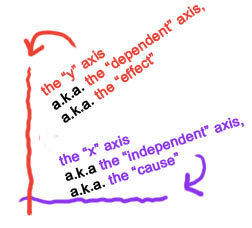

In the context of Statistical learning, there are two types of data:
* Independent variables: Data that can be controlled directly.
* Dependent variables: Data that cannot be controlled directly.

The data that can’t be controlled i.e. dependent variables need to predicted or estimated.

The equation for a line is:
$$ y= mx + c $$


**y** is the dependent variable which needs to be predicted or estimated  
**x** is the independent variable which is usually our inputs  
**m** is the slope  
**c** is the y-intercept

For linear regressions, we use the following equation:
$$ Y = \beta_0 + \beta_1X+\epsilon$$
$\beta_0$ and $\beta_1$ are two unknown constants that represent the intercept and slope. They are parameters.
$\epsilon$ is the error.


In [ ]:
df = pd.read_csv('../datasets/grades.csv')
df

## Some chart types

### Histograms and Density Plots

A histogram is a graphical display of data using bars of different heights. In a histogram, each bar groups numbers into ranges. Taller bars show that more data falls in that range. A histogram displays the shape and spread of continuous sample data.

In [ ]:
# matplotlib
for col in ['math score', 'reading score', 'writing score']:
    plt.hist(df[col], alpha=0.4)

In [ ]:
# seaborn
for col in ['math score', 'reading score', 'writing score']:#, lunch 	test preparation course 	math score 	reading score 	writing score'
    sns.distplot(df[col])

In [ ]:
sns.kdeplot(df['math score'])
sns.kdeplot(df['writing score'])
sns.kdeplot(df['reading score'])

In [ ]:
df[['math score', 'reading score', 'writing score']].plot(kind='kde')

### Box Plots

In descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending from the boxes (whiskers) indicating variability outside the upper and lower quartiles

In [ ]:
df[['math score','reading score', 'writing score']].boxplot()

### Scatter Plots

A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

In [ ]:
df.plot(x='reading score', y='math score',kind='scatter')

<a href="#" id="hw"></a>
<div style="background: #000;
            color: #FFF;
            margin-bottom: 10px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 style="padding: 0px 0px 0px 0px;">Futher Reading</h1>
</div>

https://seaborn.pydata.org/tutorial.html  
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html  
https://cs.brown.edu/courses/cs022/static/files/documents/sets.pdf   
https://seeing-theory.brown.edu/basic-probability/index.html     
https://seeing-theory.brown.edu/doc/basic-probability.pdf     

[Probability Cheatsheet](https://github.com/georgearun/Data-Science--Cheat-Sheet/blob/master/Probability%20and%20Statistics/probability_cheatsheet.pdf)